# CS 412 Homework 2

# Ceren Arkac
# 28269

## Import Libraries
The libraries used in this homework are already preinstalled in Google Colab. If you are working locally, make sure to create a virtual environment and install the required libraries there.

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
import re

nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ceren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ceren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load data

In [161]:
# Downloading data
import gdown
data_url = "https://drive.google.com/uc?id=1qWmgoMgr56hpCEjJe0XQ-K46-yMpFhVS"
save_path = "imdb_dataset.csv"
gdown.download(data_url, save_path)

Downloading...
From: https://drive.google.com/uc?id=1qWmgoMgr56hpCEjJe0XQ-K46-yMpFhVS
To: c:\Users\ceren\cs412_nlp\imdb_dataset.csv
100%|██████████| 66.2M/66.2M [00:06<00:00, 10.4MB/s]


'imdb_dataset.csv'

In [162]:
df = pd.read_csv("imdb_dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## **1. Preproces text data** (30 pts)
In this section, you have to preprocess the text data in order to convert it to a numerical representation that can be passed to machine learning models.

### 1.1 **Remove HTML**
Since these reviews were scraped from the internet, some of them still have some HTML tags (like \<a> or \<br>). These tags do not have any semantic meaning. Therefore, we have to remove them to avoid having noise in our data. Otherwise, the model will assume that these are words that have meanings. Here is one example of HTML tags in our data:

In [163]:
# see a data point
print(df.loc[1, 'review'])
print(df.loc[1, 'sentiment'])

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.
p

In [164]:
# Remove HTML

def remove_html_tags(text):
    # Create a BeautifulSoup object
    soup = BeautifulSoup(text, "html.parser")

    # Extract text content without HTML tags
    clean_text = soup.get_text()

    return clean_text

df['review'] = df['review'].apply(remove_html_tags)
df['sentiment'] = df['sentiment'].apply(remove_html_tags)

C:\Users\ceren\AppData\Local\Temp\ipykernel_22636\500609648.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [165]:
# check a data point
df.loc[13, 'review']

"The cast played Shakespeare.Shakespeare lost.I appreciate that this is trying to bring Shakespeare to the masses, but why ruin something so good.Is it because 'The Scottish Play' is my favorite Shakespeare? I do not know. What I do know is that a certain Rev Bowdler (hence bowdlerization) tried to do something similar in the Victorian era.In other words, you cannot improve perfection.I have no more to write but as I have to write at least ten lines of text (and English composition was never my forte I will just have to keep going and say that this movie, as the saying goes, just does not cut it."

### 1.2 **Converting text to lowercase**

In text analysis, we usually convert text to lowercase to avoid having a very large vocabulary. For instance, if we do not convert the text to lowercase, the model will treat "apple", "Apple", and "APPLE" as completely different words. This way the number of words that the model has to know (which we call vocabulary) becomes very large.

In [166]:
# Convert to lower case
# Convert 'review' column to lowercase
df['review'] = df['review'].apply(lambda x: x.lower())

# Convert 'sentiment' column to lowercase
df['sentiment'] = df['sentiment'].apply(lambda x: x.lower())

In [167]:
# see the changes 
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [168]:
#sentiment count
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

##### No need to preprocess df['sentiment']

### 1.3 **Remove punctuation and special characters**
Since our goal in this task is sentiment analysis, punctuations and special characters (like parantheses, percentage signs, etc.) do not change the sentiment of a movie review. Therefore we remove them to reduce the vocabulary size. One may argue that the exclamation (!) mark may affect the intensity of a sentiment. You have the choice to choose which punctuation marks to remove and which ones to keep. You have to remove some of them though to get the points for this part :)

In [169]:
# Remove punctuation and special characters
#Removing the square brackets

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def denoise_text(text):
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    return text

df['review'] = df['review'].apply(denoise_text)

In [170]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


### 1.4 **Tokenization**
Now we want to convert each review into a sequence of words. This process is called tokenization. **Use `word_tokenize` from the `nltk.tokenize` module to tokenize each review**.

In [171]:
# Tokenize the review texts
from nltk.tokenize import word_tokenize

# Function to tokenize a text
def tokenize_text(text):
    return word_tokenize(text)

# Assuming df is your DataFrame with a 'review' column
df['review'] = df['review'].apply(tokenize_text)

In [172]:
df

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, the, filmin...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, theres, a, family, where, a, littl...",negative
4,"[petter, matteis, love, in, the, time, of, mon...",positive
...,...,...
49995,"[i, thought, this, movie, did, a, down, right,...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[i, am, a, catholic, taught, in, parochial, el...",negative
49998,"[im, going, to, have, to, disagree, with, the,...",negative


### 1.5 **Removing stop words**


We also need to remove the stopwords (is, the, you, etc.) since they do not add to the meaning. Why? To reduce the vocabulary size 😃. **You can get a list of all stopwords from the nltk library**.

In [173]:
# Remove stop words
from nltk.corpus import stopwords

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

print(stop_words)

{'once', 'myself', 'she', 'hadn', 'some', 'too', "you're", 'does', 'themselves', "couldn't", 'will', 'after', 're', 'at', 'through', 'on', "isn't", 'from', 'the', "aren't", 'm', 'there', "it's", 'which', 'but', 'were', 'ours', 'its', 'didn', "hasn't", 'being', 'did', 'such', 'my', 'we', 'against', 'if', 'that', "that'll", 'between', "didn't", 'doesn', 'isn', 'ma', 'our', "mustn't", 'should', 'do', 'when', 'your', 'up', 'mightn', "you'd", 'few', 'him', 'here', 'having', 'above', "mightn't", 'hasn', 'haven', "you've", "haven't", 'before', 'as', 'out', 'yours', 'an', 'aren', 'mustn', 'during', 'because', 'yourself', 'how', 'nor', 'he', 's', 'weren', 'y', "doesn't", 'over', 'their', 'to', 't', "you'll", 'has', 'off', 'than', 'it', "should've", 'not', 'd', 'doing', 'own', 'are', 'ourselves', 'then', 'where', 'again', "she's", 'or', 'won', 'for', 'each', 'most', 'below', 'all', "weren't", 'other', 'shan', "wouldn't", 'am', 'these', 'they', 'her', 'himself', 'just', 'now', "needn't", 'no', 'w

In [174]:
df['review']

0        [one, of, the, other, reviewers, has, mentione...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, this, was, a, wonderful, way, to,...
3        [basically, theres, a, family, where, a, littl...
4        [petter, matteis, love, in, the, time, of, mon...
                               ...                        
49995    [i, thought, this, movie, did, a, down, right,...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, am, a, catholic, taught, in, parochial, el...
49998    [im, going, to, have, to, disagree, with, the,...
49999    [no, one, expects, the, star, trek, movies, to...
Name: review, Length: 50000, dtype: object

In [175]:
def remove_stopwords(tokens):
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens
#Apply function on review column
df['review'] = df['review'].apply(remove_stopwords)
df['review']

0        [one, reviewers, mentioned, watching, 1, oz, e...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, theres, family, little, boy, jake,...
4        [petter, matteis, love, time, money, visually,...
                               ...                        
49995    [thought, movie, right, good, job, wasnt, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [im, going, disagree, previous, comment, side,...
49999    [one, expects, star, trek, movies, high, art, ...
Name: review, Length: 50000, dtype: object

### 1.6 **Stemming**

Apply stemming using one of the `SnowballStemmer` stemmers in the nltk library.

In [176]:
# Apply Stemming
from nltk.stem import SnowballStemmer


def stem_text(tokens):
    # Initialize the SnowballStemmer for English
    stemmer = SnowballStemmer(language = 'english')
    # Apply stemming to each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Apply stemming to the 'tokenized_review' column
df['review'] = df['review'].apply(stem_text)

In [177]:
df['review']

0        [one, review, mention, watch, 1, oz, episod, y...
1        [wonder, littl, product, film, techniqu, unass...
2        [thought, wonder, way, spend, time, hot, summe...
3        [basic, there, famili, littl, boy, jake, think...
4        [petter, mattei, love, time, money, visual, st...
                               ...                        
49995    [thought, movi, right, good, job, wasnt, creat...
49996    [bad, plot, bad, dialogu, bad, act, idiot, dir...
49997    [cathol, taught, parochi, elementari, school, ...
49998    [im, go, disagre, previous, comment, side, mal...
49999    [one, expect, star, trek, movi, high, art, fan...
Name: review, Length: 50000, dtype: object

### 1.7 **Joining review text**
Now that we have removed the stopwords and applied stemming on each word, we need to convert each review from a list of word to a space-separated string. The reason we do this is that the functions that are used to extract numerical representations from text expect the input to be a single string not a list of words.

**Convert each review from a list of words to a space-separated string.**

In [178]:
# Your solution
df['review'] = df['review'].apply(lambda x: ' '.join(x))
df['review']

0        one review mention watch 1 oz episod youll hoo...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic there famili littl boy jake think there ...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job wasnt creativ orig...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previous comment side maltin one...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

## 2. **Buidling Simple NN Models** (70 Pts)
In this section, you will build neural network models to predict the sentiment of each review. You will build three models, where each of the models uses a different numerical representation of the text.

In [179]:
# Import all necessary libraries here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import keras_tuner
from keras import layers


### 2.1 **Data preparation**

#### 2.1.1 **Encoding labels**
Encode the labels ("positive" and "negative") as 0 for "negative" and 1 for "positive".

In [180]:
# Encode labels
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [181]:
df

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job wasnt creativ orig...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,im go disagre previous comment side maltin one...,0


#### 2.1.2 **Splitting data**
Split your data into train, validation, and test sets. You should use 80% of your data for training and 20% for testing. You should also use 20% of your training data for validation. **Set random_state to 42 to ensure consistent results.**

Hint: You can pass parameters in Keras to use some of your data for validation while training.

In [182]:
# check if data is balanced or not
df['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

##### Data is balanced. No need to stratify or something else

In [183]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets (80% training, 20% test)
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [184]:
print("train_data ", train_X.shape)
print("train_labels ", train_y.shape)
print("_"*100)
print("test_data ", test_X.shape)
print("test_labels ", test_y.shape)
print("_"*100)

train_data  (40000,)
train_labels  (40000,)
____________________________________________________________________________________________________
test_data  (10000,)
test_labels  (10000,)
____________________________________________________________________________________________________


##### Validation set will be created while fitting the model using Keras

#### **Exploring vocabulary**
Create a dictionary that maps each word in your training data to the number of times it occurs in the training data. The dictionary should have the following format:

```
vocab_count = {
  "word1": 1,
  "word2": 120,
  ...
}
```

In [185]:
# Create a dictionary for vocabulary count inn training data
vocab_count = dict()


In [186]:
def count_occurrences(text):
    words = text.split()  # Split the text into words
    for word in words:
        if word not in vocab_count.keys():
            vocab_count[word] = text.count(word)
        else:
            vocab_count[word] = vocab_count[word] + 1

train_X.apply(count_occurrences)
vocab_count

{'that': 5741,
 'kept': 1198,
 'ask': 2324,
 'mani': 10626,
 'fight': 2978,
 'scream': 1031,
 'match': 1142,
 'swear': 287,
 'general': 1885,
 'mayhem': 119,
 'permeat': 49,
 '84': 30,
 'minut': 5554,
 'comparison': 494,
 'also': 14035,
 'stand': 2044,
 'think': 13880,
 'onedimension': 160,
 'charact': 21987,
 'littl': 9836,
 'depth': 855,
 'virtual': 443,
 'imposs': 807,
 'care': 3295,
 'happen': 5564,
 'bad': 15204,
 'written': 2264,
 'cypher': 44,
 'director': 7154,
 'hang': 670,
 'multicultur': 8,
 'belief': 426,
 'topic': 383,
 'done': 4683,
 'much': 15067,
 'better': 8836,
 'drama': 2239,
 'tv': 4251,
 'cinemai': 9,
 'must': 4934,
 'confess': 300,
 'im': 7246,
 'realli': 18280,
 'one': 42221,
 'spot': 821,
 'perform': 8367,
 'film': 73571,
 'said': 3378,
 'nichola': 122,
 'burley': 3,
 'heroin': 567,
 'slutti': 43,
 'best': 9881,
 'friend': 5358,
 'wasim': 4,
 'zakir': 2,
 'nasti': 527,
 'bulli': 220,
 'brother': 2400,
 'absolut': 2910,
 'terribl': 2981,
 'dont': 13242,
 'know': 

count_arr:  [5741 1198 2324 ...    1    1    1]
vocab:  ['that' 'kept' 'ask' ... 'nothingyoul' 'paperit' 'charactersgood']
Vocabulary size: 155620
Top 15 frequent words: movi, film, one, like, time, good, make, see, get, charact, watch, even, stori, would, realli
Least frequent 15 words: sendin, bitdan, girlfriendthi, uttara, baokar, kaire, proletarion, batoth, facism, pointlessif, gauthamfrom, acp, anbuchelvanno, doubtclassyjyothika, underbudgetse



c:\Users\ceren\Anaconda3\envs\cs412nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


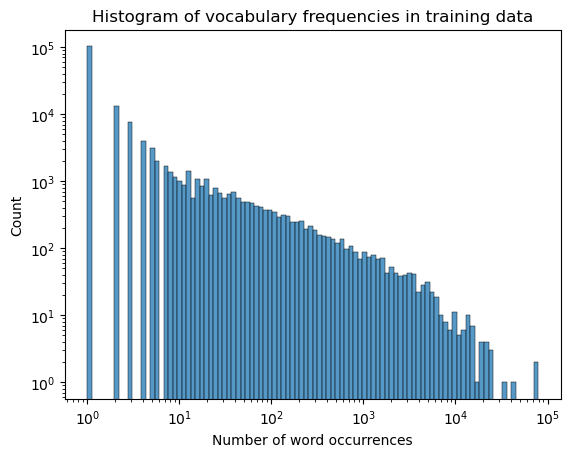

In [187]:
# Run this cell to explore the vocabulary
import seaborn as sns
count_arr = np.array(list(vocab_count.values()))
vocab = np.array(list(vocab_count.keys()))
print("count_arr: ", count_arr)
print("vocab: ", vocab)

# Sorting by frequency
sort_idx = np.argsort(count_arr)[::-1]
vocab = vocab[sort_idx]
count_arr = count_arr[sort_idx]

print(f"Vocabulary size: {len(vocab)}")
print(f"Top 15 frequent words: {', '.join(vocab[:15])}")
print(f"Least frequent 15 words: {', '.join(vocab[-15:])}")
print()

ax = sns.histplot(count_arr, log_scale=True, bins=100)
ax.set_yscale('log')
ax.set_xlabel('Number of word occurrences')
ax.set_title("Histogram of vocabulary frequencies in training data")
plt.show()

### 2.2 **Bag of Words (BoW) model**
Create a simple NN model that utilizes the Bag of Words representation.

#### 2.2.1 **Generate Bag of Words (BoW) representation**

You can use the `CountVectorizer` class from `sklearn` to do this. Since your data is already preprocessed, set the `preprocessor` argument of `CountVectorizer` to pass a function that does nothing (`lambda x: x`). This way, `CountVectorizer` will not do any preprocessing on your data.

Choose a reasonable value for the `max_features` argument. This argument determines how many words will be included in your vocabulary. For example, if your total vocabulary count is 100,000 and you set `max_features = 2,000`, `CountVectorizer` will only consider the **most frequent** 2,000 words in your vocabulary. The rest of the vocabulary will be ignored.

* [CountVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [188]:
# Your solution
from sklearn.feature_extraction.text import CountVectorizer

max_features =5000
vectorizer = CountVectorizer(max_features=max_features, preprocessor=lambda x: x)

# Fit the vectorizer to your train data
vectorizer.fit(train_X)

# Transform the train and test data
train_bow = vectorizer.transform(train_X)
test_bow = vectorizer.transform(test_X)

In [189]:
# The shape of the train data BoW representation should be
# (Number of data points in training data x max_features)
print(train_bow.shape)

(40000, 5000)


#### 2.2.2 **Train a neural network on BoW data**
Use a small neural network to predict the sentiment of reviews from the BoW representation of the reviews. Use the keras library for this task.

**Notes**:
* Your neural network should have **maximum two hidden layers**.
* Train for **10 epochs or less**
* Choose any method you find suitable to **avoid overfitting**

In [190]:
train_bow = train_bow.toarray()  # Convert to dense array
test_bow = test_bow.toarray()    # Convert to dense array
# Split the data into training and validation sets
train_bow, val_bow, train_y_bow, val_y_bow = train_test_split(
    train_bow, train_y, test_size=0.2, random_state=42
)

In [191]:
print("train_X for bow: ", train_bow.shape)
print("val_X for bow: ", val_bow.shape)
print("train_y for bow: ", train_y_bow.shape)
print("val_y for bow: ", val_y_bow.shape)

train_X for bow:  (32000, 5000)
val_X for bow:  (8000, 5000)
train_y for bow:  (32000,)
val_y for bow:  (8000,)


In [192]:

def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                           activation='relu',
                           input_shape=(max_features,)))

    # First hidden layer
    model.add(layers.Dense(units=hp.Int('units_hidden1', min_value=32, max_value=512, step=32),
                           activation='relu'))

    # Check if the second hidden layer should be a dense layer or a dropout layer
    use_dropout = hp.Boolean('use_dropout', default=False)
    
    if use_dropout:
        dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1, default=0.0)
        model.add(layers.Dropout(rate=dropout_rate))

    # Second hidden layer (either another dense layer or a dropout layer)
    if not use_dropout:
        model.add(layers.Dense(units=hp.Int('units_hidden2', min_value=32, max_value=512, step=32),
                               activation='relu'))
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

# Initialize the tuner
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=4,
    executions_per_trial = 2,
    directory = './my_keras_tunings_last/bow_hyperparameter_tuning/'

)
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(train_bow, train_y_bow, epochs=6, batch_size=32, validation_data=(val_bow, val_y_bow), callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print("Best hyperparameter values: ", best_hps)



Trial 4 Complete [00h 02m 10s]
val_accuracy: 0.8812499940395355

Best val_accuracy So Far: 0.8834999799728394
Total elapsed time: 00h 06m 26s
Best hyperparameter values:  {'units_input': 32, 'units_hidden1': 256, 'use_dropout': True, 'units_hidden2': 96, 'dropout_rate': 0.30000000000000004}


##### It is time to get the selected hyperparameter values and train the final model 

In [194]:
# build the model


# Extract hyperparameters from the best_hps dictionary
units_input = best_hps['units_input']
units_hidden1 = best_hps['units_hidden1']
use_dropout = best_hps['use_dropout']
dropout_rate = best_hps['dropout_rate']
units_hidden2 = best_hps['units_hidden2']

# Build the model with the best hyperparameters and train
model = Sequential()

# Input layer
model.add(layers.Dense(units=units_input, activation='relu', input_shape=(max_features,)))

# First hidden layer
model.add(layers.Dense(units=units_hidden1, activation='relu'))

# Check if the second hidden layer should be a dense layer or a dropout layer
if use_dropout:
    model.add(layers.Dropout(rate=dropout_rate))
    pass

# Second hidden layer (either another dense layer or a dropout layer)
if not use_dropout:
    model.add(layers.Dense(units=units_hidden2, activation='relu'))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# train the model
history = model.fit(
    train_bow, train_y_bow,
    epochs=6,
    batch_size=32,
    validation_data=(val_bow, val_y_bow),
    callbacks=[early_stopping]
)


Epoch 1/6
2000/2000 [==============================] - 12s 6ms/step - loss: 0.3323 - accuracy: 0.8620 - val_loss: 0.2831 - val_accuracy: 0.8864
Epoch 2/6
2000/2000 [==============================] - 9s 5ms/step - loss: 0.2179 - accuracy: 0.9110 - val_loss: 0.2993 - val_accuracy: 0.8874
Epoch 3/6
2000/2000 [==============================] - 10s 5ms/step - loss: 0.1342 - accuracy: 0.9494 - val_loss: 0.3714 - val_accuracy: 0.8776
Epoch 4/6
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0656 - accuracy: 0.9767 - val_loss: 0.5612 - val_accuracy: 0.8712
Epoch 5/6
2000/2000 [==============================] - 18s 9ms/step - loss: 0.0311 - accuracy: 0.9889 - val_loss: 0.7763 - val_accuracy: 0.8656


In [195]:
# Show model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160032    
                                                                 
 dense_4 (Dense)             (None, 256)               8448      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 168737 (659.13 KB)
Trainable params: 168737 (659.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


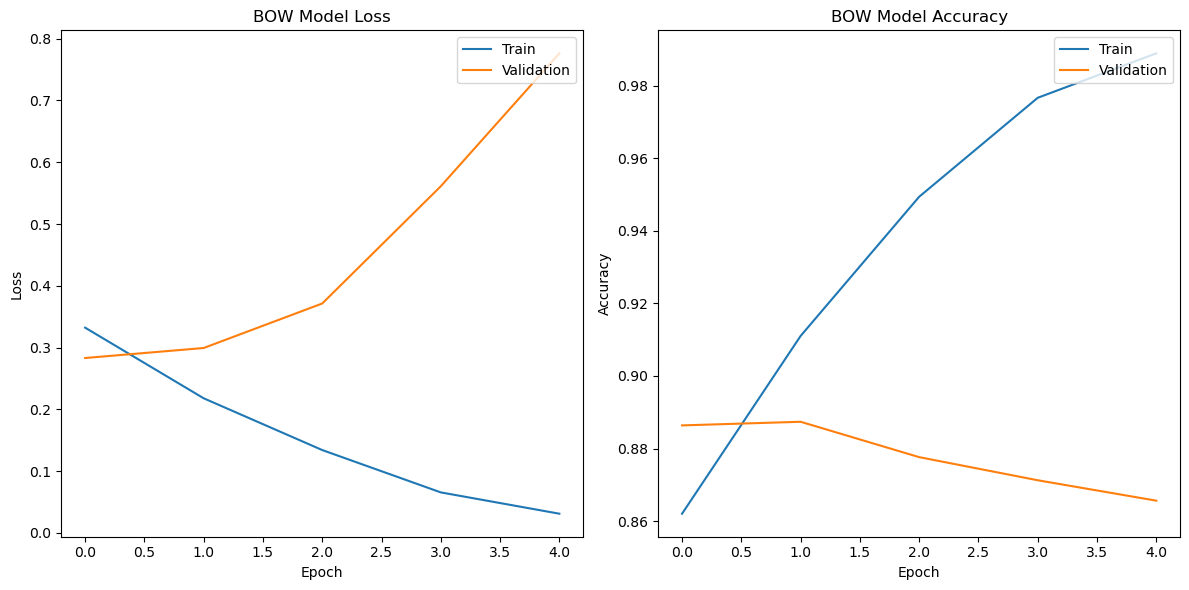

In [197]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BOW Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BOW Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


##### It seems like the model was overfitted. I used early stopping and hyperparameter tuning. Also, I applied regularization by adding a dropout layer. Maybe, experimenting more on the model may lead to training a better model. On the other hand, BOW has always a chance to overfit. Ultimately, the efforts may be wasted.

#### 2.2.3 **Evaluate on test dataset**
After choosing the suitable model hyperparameters and training a model in the previous step, evaluate your model on the test set. Choose the metrics you find suitable for evauluating this model.

**Note**: Evaluation on the test dataset should only be done once. Updating your model iteratively until you get a good performance on the test dataset is not a good practice and will result in overfitting on the test dataset.

In [198]:
# Evaluate the model on the test set

from sklearn.metrics import accuracy_score

# Assuming 'model' is your trained model
predictions = model.predict(test_bow)
binary_predictions = (predictions > 0.5).astype(int)
accuracy = accuracy_score(test_y, binary_predictions)
print(f"Accuracy: {accuracy}")


313/313 [==============================] - 1s 3ms/step
Accuracy: 0.8775


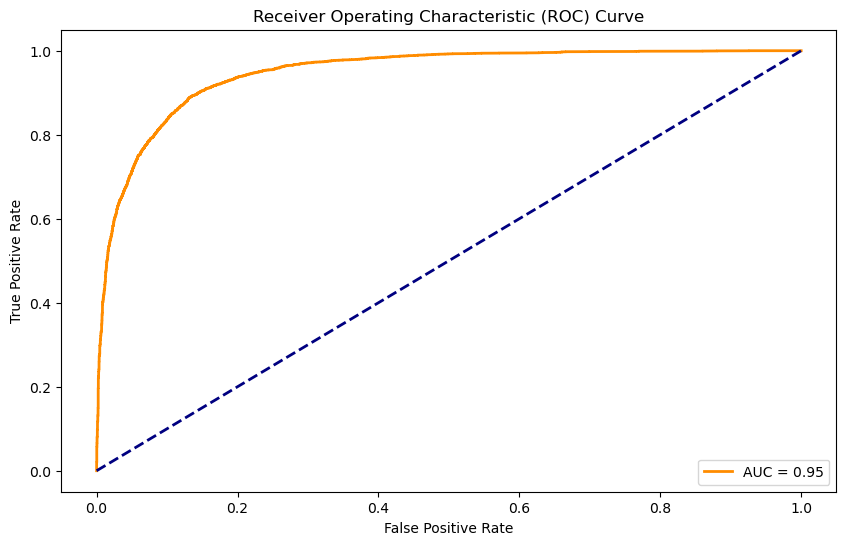

In [199]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##### AUC is pretty close to 1, which is a good signal. 

In [200]:
# relax the memory
tf.keras.backend.clear_session()

### 2.3 **TF-IDF**

Create a simple NN model that utilizes the TF-IDF representation.

#### 2.3.1 **Generate TF-IDF representation**

You can use the `TfidfVectorizer` class from `sklearn` to do this. Since your data is already preprocessed, set the `preprocessor` argument of `TfidfVectorizer` to pass a function that does nothing (`lambda x: x`). This way, `TfidfVectorizer` will not do any preprocessing on your data.

Choose a reasonable value for the `max_features` argument.

* [TfidfVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [201]:
# Your solution
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 5000
# Use TfidfVectorizer this time
tfidf_vectorizer = TfidfVectorizer(max_features=max_features, preprocessor=lambda x: x)

# Fit the vectorizer to your train data
tfidf_vectorizer.fit(train_X)


# Transform the train and test data
train_tfidf = tfidf_vectorizer.transform(train_X)
test_tfidf = tfidf_vectorizer.transform(test_X)

In [202]:
train_tfidf = train_tfidf.toarray()  # Convert to dense array
test_tfidf = test_tfidf.toarray()    # Convert to dense array
# Split the data into training and validation sets
train_tfidf, val_tfidf, train_y_tfidf, val_y_tfidf = train_test_split(
    train_tfidf, train_y, test_size=0.2, random_state=42
)

#### 2.3.2 **Train a neural network on TF-IDF data**
Use a small neural network to predict the sentiment of reviews from the TF-IDF representation of the reviews. Use the keras library for this task. **You can use the same neural network structure form the BoW model.**

**Notes**:
* Your neural network should have **maximum two hidden layers**.
* Train for **10 epochs or less**
* Choose any method you find suitable to **avoid overfitting**

In [203]:
def build_model_tfidf(hp):
    model = Sequential()

    # Input layer
    model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                           activation='relu',
                           input_shape=(max_features,)))

    # First hidden layer
    model.add(layers.Dense(units=hp.Int('units_hidden1', min_value=32, max_value=512, step=32),
                           activation='relu'))

    # Check if the second hidden layer should be a dense layer or a dropout layer
    use_dropout = hp.Boolean('use_dropout', default=False)
    
    if use_dropout:
        dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1, default=0.0)
        model.add(layers.Dropout(rate=dropout_rate))

    # Second hidden layer (either another dense layer or a dropout layer)
    if not use_dropout:
        model.add(layers.Dense(units=hp.Int('units_hidden2', min_value=32, max_value=512, step=32),
                               activation='relu'))
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

# Initialize the tuner
tuner = keras_tuner.RandomSearch(
    build_model_tfidf,
    objective='val_accuracy',
    max_trials=4,
    executions_per_trial = 2,
    directory =  './my_keras_tunings_last/tfidf_hyperparameter_tuning/'

)
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(train_tfidf, train_y_tfidf, epochs=6, batch_size=32, validation_data=(val_tfidf, val_y_tfidf), callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print("Best hyperparameter values: ", best_hps)



Trial 4 Complete [00h 01m 20s]
val_accuracy: 0.882562518119812

Best val_accuracy So Far: 0.886062502861023
Total elapsed time: 00h 08m 56s
Best hyperparameter values:  {'units_input': 32, 'units_hidden1': 64, 'use_dropout': False, 'units_hidden2': 448, 'dropout_rate': 0.30000000000000004}


##### The decision from keras tuner object is 'use_dropout': False. Don't use a dropout layer then

In [204]:

# Extract hyperparameters from the best_hps dictionary
units_input = best_hps['units_input']
units_hidden1 = best_hps['units_hidden1']
use_dropout = best_hps['use_dropout']
dropout_rate = best_hps['dropout_rate']
units_hidden2 = best_hps['units_hidden2']

# Build the model with the best hyperparameters and train
model_tfidf = Sequential()

# Input layer
model_tfidf.add(layers.Dense(units=units_input, activation='relu', input_shape=(max_features,)))

# First hidden layer
model_tfidf.add(layers.Dense(units=units_hidden1, activation='relu'))

# Check if the second hidden layer should be a dense layer or a dropout layer
if use_dropout:
    model_tfidf.add(layers.Dropout(rate=dropout_rate))
    pass

# Second hidden layer (either another dense layer or a dropout layer)
if not use_dropout:
    model_tfidf.add(layers.Dense(units=units_hidden2, activation='relu'))

# Output layer
model_tfidf.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model_tfidf.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


history = model_tfidf.fit(
    train_tfidf, train_y_tfidf,
    epochs=6,
    batch_size=32,
    validation_data=(val_tfidf, val_y_tfidf),
    callbacks=[early_stopping]
)



Epoch 1/6
1000/1000 [==============================] - 8s 7ms/step - loss: 0.3276 - accuracy: 0.8558 - val_loss: 0.2753 - val_accuracy: 0.8864
Epoch 2/6
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2278 - accuracy: 0.9088 - val_loss: 0.2939 - val_accuracy: 0.8810
Epoch 3/6
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1521 - accuracy: 0.9411 - val_loss: 0.3364 - val_accuracy: 0.8737
Epoch 4/6
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0658 - accuracy: 0.9750 - val_loss: 0.5588 - val_accuracy: 0.8710


In [205]:
# Show model summary
model_tfidf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160032    
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 448)               29120     
                                                                 
 dense_7 (Dense)             (None, 1)                 449       
                                                                 
Total params: 191713 (748.88 KB)
Trainable params: 191713 (748.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 2.2.3 **Evaluate on test dataset**
After choosing the suitable model hyperparameters and training a model in the previous step, evaluate your model on the test set. Choose the metrics you find suitable for evauluating this model.

In [206]:
# Evaluate the model on the test set

from sklearn.metrics import accuracy_score

predictions = model_tfidf.predict(test_tfidf)
binary_predictions = (predictions > 0.5).astype(int)
accuracy = accuracy_score(test_y, binary_predictions)
print(f"Accuracy: {accuracy}")


313/313 [==============================] - 1s 3ms/step
Accuracy: 0.881


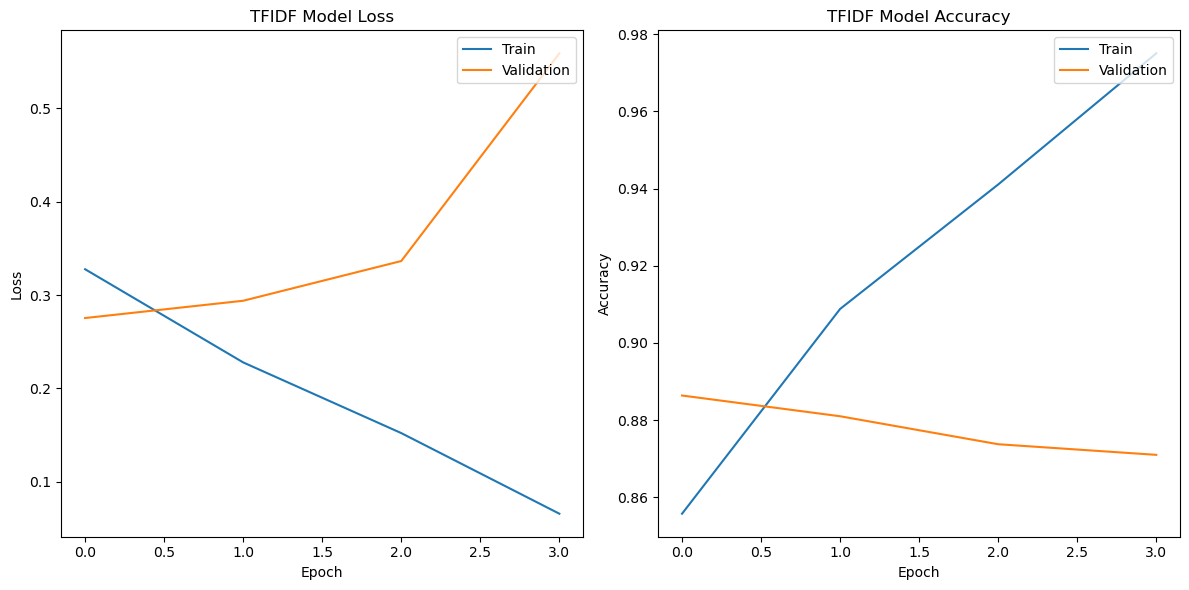

In [207]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('TFIDF Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('TFIDF Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

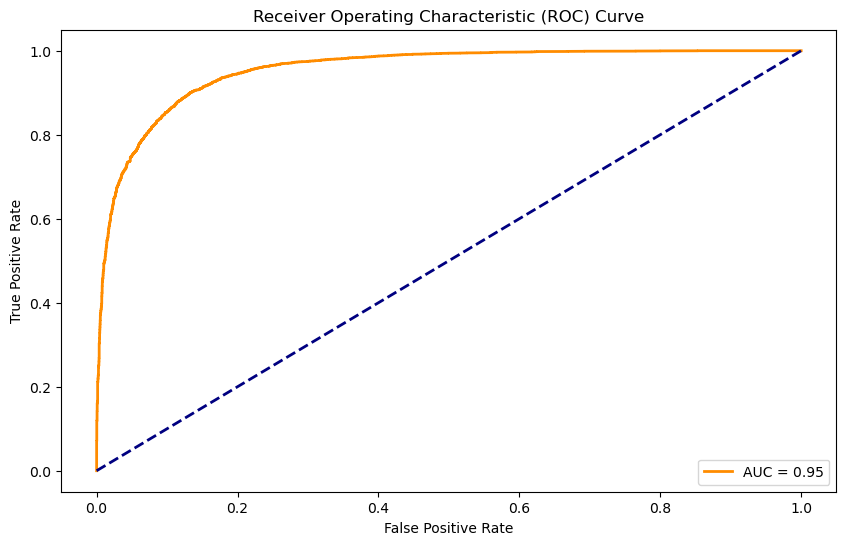

In [208]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### It seems like the model is overfitted again. 

### 2.4 **Word2Vec**
In this section, you will use Word2Vec representations to train a simple neural network to predict the sentiments of reviews.

#### 2.4.1 **Preliminary About Word2Vec**

In [209]:
import gensim.downloader
from gensim.models import Word2Vec
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras import losses

The following cell will load a pretrained Word2Vec model. This is a model trained on a large corpus of data to produce meaningful representations of words as vectors.

In [210]:
# Loading pretrained Word2Vec model (Word embeddings)
model_name = "glove-wiki-gigaword-100"
word_to_vec = gensim.downloader.load(model_name)

In [211]:
# Getting the representation of a word
dog = word_to_vec["dog"]
dog

array([ 0.30817  ,  0.30938  ,  0.52803  , -0.92543  , -0.73671  ,
        0.63475  ,  0.44197  ,  0.10262  , -0.09142  , -0.56607  ,
       -0.5327   ,  0.2013   ,  0.7704   , -0.13983  ,  0.13727  ,
        1.1128   ,  0.89301  , -0.17869  , -0.0019722,  0.57289  ,
        0.59479  ,  0.50428  , -0.28991  , -1.3491   ,  0.42756  ,
        1.2748   , -1.1613   , -0.41084  ,  0.042804 ,  0.54866  ,
        0.18897  ,  0.3759   ,  0.58035  ,  0.66975  ,  0.81156  ,
        0.93864  , -0.51005  , -0.070079 ,  0.82819  , -0.35346  ,
        0.21086  , -0.24412  , -0.16554  , -0.78358  , -0.48482  ,
        0.38968  , -0.86356  , -0.016391 ,  0.31984  , -0.49246  ,
       -0.069363 ,  0.018869 , -0.098286 ,  1.3126   , -0.12116  ,
       -1.2399   , -0.091429 ,  0.35294  ,  0.64645  ,  0.089642 ,
        0.70294  ,  1.1244   ,  0.38639  ,  0.52084  ,  0.98787  ,
        0.79952  , -0.34625  ,  0.14095  ,  0.80167  ,  0.20987  ,
       -0.86007  , -0.15308  ,  0.074523 ,  0.40816  ,  0.0192

In [212]:
dog.shape

(100,)

These representations are meaningful in a sense that words that have similar meanings are closer to each other. In general, when dealing with vector representations, we use **cosine similarity** to see how similar two vectors are. it returns a value between -1 and +1, the higher the value the more similar two vectors are.

Notice in the example below that **car** is more similar to **vehicle** than **cat**.

In [213]:
from  sklearn.metrics.pairwise import cosine_similarity
car = word_to_vec["car"].reshape(1, -1) # Reshaping because cosine_similarity function requires a 2D array
cat = word_to_vec["cat"].reshape(1, -1)
vehicle = word_to_vec["vehicle"].reshape(1, -1)

print(f"Similarity between car and cat: {cosine_similarity(car, cat)}")
print(f"Similarity between car and vehicle: {cosine_similarity(car, vehicle)}")

Similarity between car and cat: [[0.31097823]]
Similarity between car and vehicle: [[0.86308384]]


#### 2.4.2 **Use pretrained Word2Vec model**
First, you will try to use the pretrained Word2Vec model to generate representations for each review and use the representation to train a neural network.

Remember that we are trying to classify movie reviews, which have can have any number of words. Word2Vec returns a vector representation for each word. Therefore, you have to find a way to create a **fixed-sized representation** for the whole review. Fixed-size means that the vector representation of each review should have the same size regardless of the length of the review.

In [214]:
# clear session before starting computationally heavy operatiions
tf.keras.backend.clear_session()

In [220]:
# Your solution
# This function should convert each review to a fixed-sized vectorized representation

from gensim.models import Word2Vec
import numpy as np

def vectorize(review, model):
    # Tokenize the review into words
    words = review.split()

    # Initialize an array to store the word vectors
    word_vectors = []

    # Iterate over words and get the word vectors
    for word in words:
        if word in model:
            word_vectors.append(model[word])

    # If no valid word vectors found, return a zero vector
    if not word_vectors:
        print("there is a rare word")
        return np.zeros(model.vector_size)

    # Take the average of word vectors to create a fixed-sized representation
    review_vector = np.mean(word_vectors, axis=0)

    return review_vector

# Applying the function to convert the train and test reviews to vector representations
train_X_w2v = [vectorize(review, word_to_vec) for review in train_X]
test_X_w2v = [vectorize(review, word_to_vec) for review in test_X]

# Convert the lists to NumPy arrays
train_X_w2v = np.array(train_X_w2v)
test_X_w2v = np.array(test_X_w2v)


In [221]:
print(train_X_w2v)

[[-0.04271294  0.13315958  0.23563567 ... -0.17216109  0.16565174
   0.15179503]
 [-0.14697699  0.05528805  0.24102382 ... -0.144988    0.22304904
   0.15051514]
 [-0.05865414  0.29728767  0.28217056 ... -0.31161827  0.34921986
   0.26090467]
 ...
 [-0.02360627  0.14530496  0.29585502 ... -0.03543709  0.02508045
   0.13447362]
 [ 0.00397707  0.2159814   0.33035964 ... -0.23121385  0.32669532
   0.20933166]
 [-0.06280494  0.13514075  0.2531852  ... -0.18529804  0.46032694
   0.16332069]]


In [222]:
print(train_X_w2v.shape)

(40000, 100)


##### Vector representations are in length of 100. Use this information during the model training

In [223]:
# Split the data into training and validation sets
train_X_w2v, val_X_w2v, train_y_w2v, val_y_w2v = train_test_split(
    train_X_w2v, train_y, test_size=0.2, random_state=42
)

In [224]:
print("train_X for w2v: ", train_X_w2v.shape)
print("val_X for w2v: ", val_X_w2v.shape)
print("train_y for w2v: ", train_y_w2v.shape)
print("val_y for w2v: ", val_y_w2v.shape)

train_X for w2v:  (32000, 100)
val_X for w2v:  (8000, 100)
train_y for w2v:  (32000,)
val_y for w2v:  (8000,)


In [225]:
vocab_size = len(word_to_vec.key_to_index)
vocab_size

400000

Train a neural network:

#### I tried to use CNN first. It may be more suitable since the embeddings can be adjusted during the training, leading a better model. However, I had some issues with that. A sequential model will also work.

In [226]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(100,))) # 100 is the vector size for vector representations
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_X_w2v, train_y_w2v,
    epochs=20,
    batch_size=16,
    validation_data=(val_X_w2v, val_y_w2v),
    callbacks=[early_stopping]
)




Epoch 1/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5699 - accuracy: 0.7073 - val_loss: 0.5160 - val_accuracy: 0.7496
Epoch 2/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.5310 - accuracy: 0.7423 - val_loss: 0.5015 - val_accuracy: 0.7575
Epoch 3/20
2000/2000 [==============================] - 5s 3ms/step - loss: 0.5226 - accuracy: 0.7489 - val_loss: 0.4966 - val_accuracy: 0.7611
Epoch 4/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5182 - accuracy: 0.7519 - val_loss: 0.4963 - val_accuracy: 0.7673
Epoch 5/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5143 - accuracy: 0.7509 - val_loss: 0.4894 - val_accuracy: 0.7674
Epoch 6/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5114 - accuracy: 0.7542 - val_loss: 0.4872 - val_accuracy: 0.7716
Epoch 7/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.5104 - accuracy: 0.7565 - val_loss: 0.4852 - val_accuracy:

In [227]:
# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21249 (83.00 KB)
Trainable params: 21249 (83.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


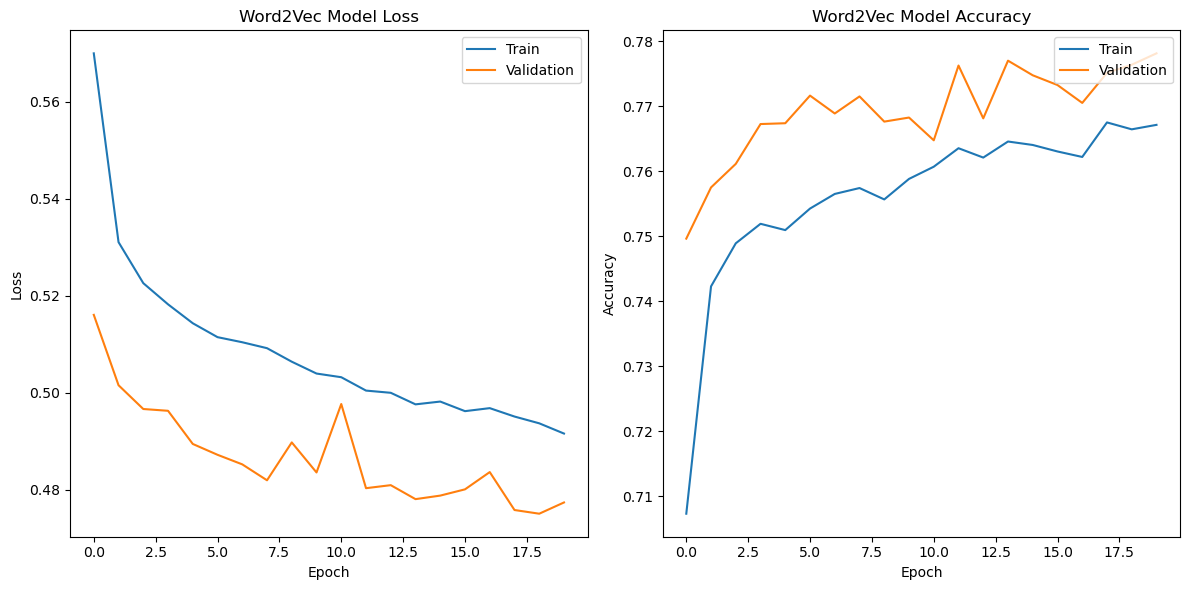

In [228]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Word2Vec Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Word2Vec Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

##### This model is much better than the models with BOW and TF-IDF representations. It is not overfitted. Validation accuracy is increasing as the training accuracy increase.

Evaluate the model on the test dataset:

In [229]:
# Evaluate the model on the test set

from sklearn.metrics import accuracy_score

predictions = model.predict(test_X_w2v)
binary_predictions = (predictions > 0.5).astype(int)
accuracy = accuracy_score(test_y, binary_predictions)
print(f"Accuracy: {accuracy}")

test_loss, test_acc = model.evaluate(test_X_w2v, test_y)
print(f"\nTest Loss: {test_loss}")

313/313 [==============================] - 0s 1ms/step
Accuracy: 0.7722
313/313 [==============================] - 1s 2ms/step - loss: 0.4849 - accuracy: 0.7722

Test Loss: 0.4849233329296112


In [236]:
from sklearn.metrics import classification_report

# Print classification report
print("\nClassification Report:")
print(classification_report(test_y, binary_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78      4961
           1       0.79      0.74      0.77      5039

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



##### Not a bad model. Let's see if we can improve in the next step of the notebook

#### 2.4.3 **Train your own Word2Vec model**
In cases where we have enough data, training a new Word2Vec model may provide better results than using a pretrained one. Here, you will train your own Word2Vec model using the training data and then use it to create vector representations for the reviews.

You can change the hyperparameters to train your Word2Vec model:
* **vector_size**: The length of the vector that will be used to represent words.
* **window**: The window sized used in the Word2Vec training
* **min_count**: Minimum number of occurunces for a word to be included in the model.


In [237]:
# Converting sentences to list of words
sentences = [sentence.split() for sentence in train_X]

# Training model
vector_size = 360
window = 5
min_count = 5

my_w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    workers=4)

Apply the same function you created above to create vector representations for the reviews from your trained Word2Vec model:

In [238]:
# Your solution
# This function should convert each review to a fixed-sized vectoriz representation
def vectorize(review, model):
    # Tokenize the review into words
    words = review.split()

    # Initialize an array to store the word vectors
    word_vectors = []

    # Iterate over words and get the word vectors
    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])

    # If no valid word vectors found, return a zero vector
    if not word_vectors:
        print("there is a rare word")
        return np.zeros(model.vector_size)

    # Take the average of word vectors to create a fixed-sized representation
    review_vector = np.mean(word_vectors, axis=0)

    return review_vector



# Applying the function to convert the train and test reviews to vector representations
train_X_my_w2v = [vectorize(review, my_w2v_model) for review in train_X]
test_X_my_w2v = [vectorize(review, my_w2v_model) for review in test_X]

# Convert the lists to NumPy arrays
train_X_my_w2v = np.array(train_X_my_w2v)
test_X_my_w2v = np.array(test_X_my_w2v)


In [239]:
# Split the data into training and validation sets
train_X_my_w2v, val_X_my_w2v, train_y_my_w2v, val_y_my_w2v = train_test_split(
    train_X_my_w2v, train_y, test_size=0.2, random_state=42
)

Train a neural network:

In [240]:
# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(360,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_X_my_w2v, train_y_my_w2v,
    epochs=20,
    batch_size=16,
    validation_data=(val_X_my_w2v, val_y_my_w2v),
    callbacks=[early_stopping]
)





Epoch 1/20
2000/2000 [==============================] - 6s 2ms/step - loss: 0.3946 - accuracy: 0.8276 - val_loss: 0.3451 - val_accuracy: 0.8553
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3611 - accuracy: 0.8472 - val_loss: 0.3188 - val_accuracy: 0.8649
Epoch 3/20
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3513 - accuracy: 0.8523 - val_loss: 0.3263 - val_accuracy: 0.8650
Epoch 4/20
2000/2000 [==============================] - 11s 6ms/step - loss: 0.3479 - accuracy: 0.8565 - val_loss: 0.3159 - val_accuracy: 0.8665
Epoch 5/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3450 - accuracy: 0.8554 - val_loss: 0.3222 - val_accuracy: 0.8680
Epoch 6/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.3424 - accuracy: 0.8572 - val_loss: 0.3111 - val_accuracy: 0.8675
Epoch 7/20
2000/2000 [==============================] - 9s 4ms/step - loss: 0.3423 - accuracy: 0.8550 - val_loss: 0.3113 - val_accuracy

In [241]:
# model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               46208     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 54529 (213.00 KB)
Trainable params: 54529 (213.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Evaluate the model on the test dataset:

In [242]:
# Evaluate the model on the test set

from sklearn.metrics import accuracy_score

# Assuming 'model' is your trained model
predictions = model.predict(test_X_my_w2v)
binary_predictions = (predictions > 0.5).astype(int)
accuracy = accuracy_score(test_y, binary_predictions)
print(f"Accuracy: {accuracy}")


313/313 [==============================] - 1s 2ms/step
Accuracy: 0.8627


In [244]:
# Print classification report
print("\nClassification Report:")
print(classification_report(test_y, binary_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4961
           1       0.85      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



##### The model performs well, with an overall accuracy of 86% and balanced scores across classes.
##### It's slightly better at identifying true 1s (recall of 88%) than true 0s (recall of 84%).
##### The precision scores suggest that when it predicts a class, it's usually correct (88% and 85% for classes 0 and 1, respectively).


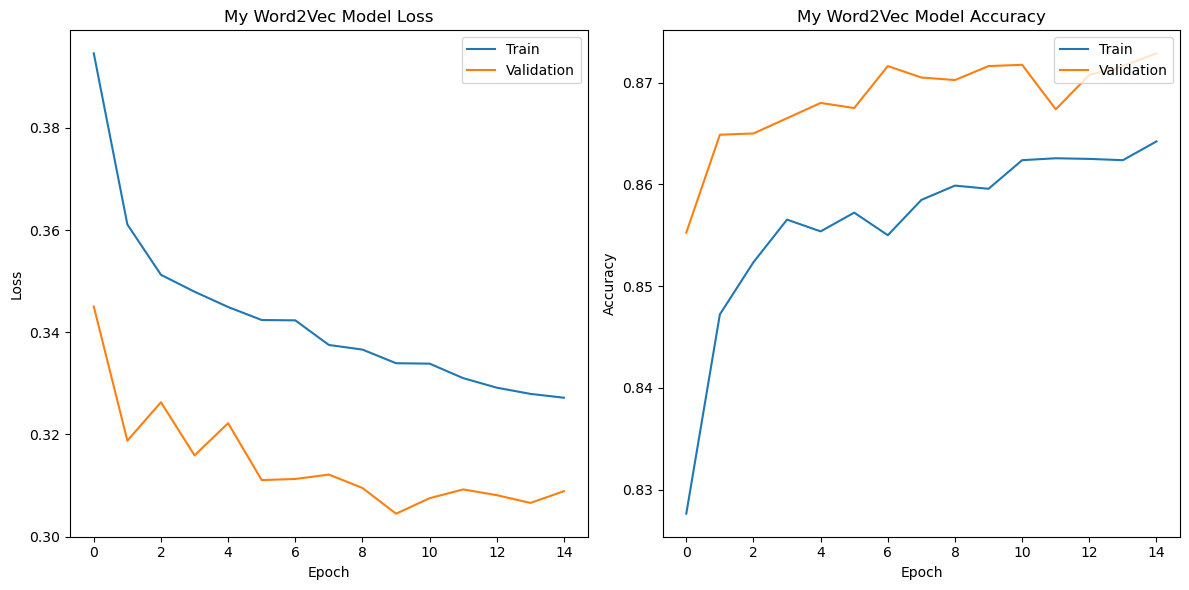

In [243]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('My Word2Vec Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('My Word2Vec Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

No overfit. Also, the second W2V model demonstrates higher scores across all metrics.


## 3.5 Chat History

Submit the link for your chat history.



*   When you are in the chat, click on the "Share Chat" button on the top right (Shown Below).

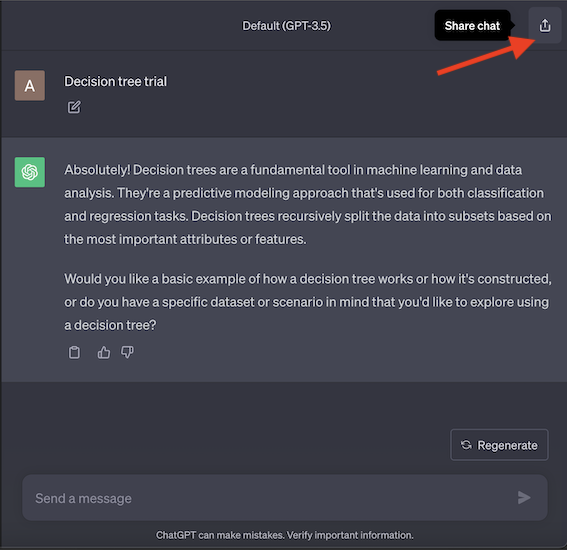

- On the screen that opens up, name the chat Name-Surname-CS412-HW2 (Shown Below).

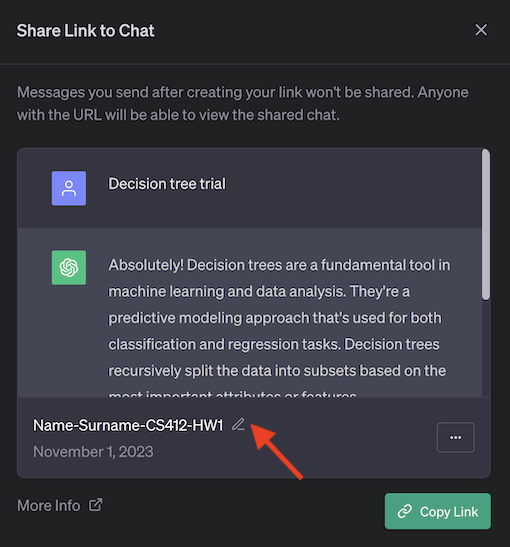

- Set sharing to "Share your name" (Shown Below).

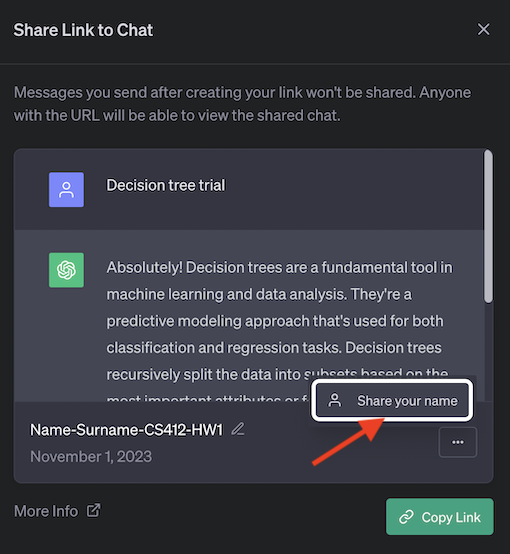

- Copy link and paste to the text cell below (Shown Below).

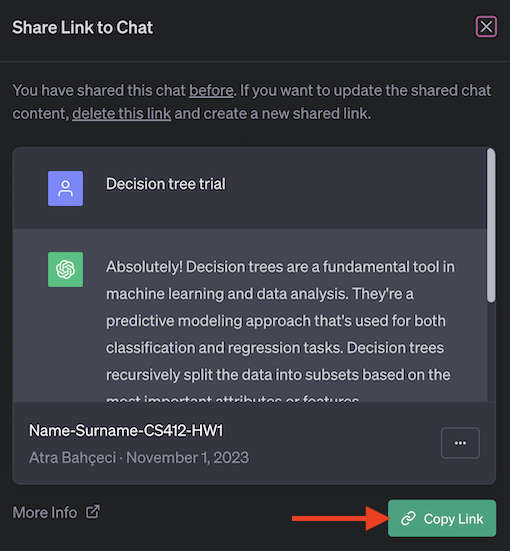

https://chat.openai.com/share/75b66aaf-371c-4510-93f6-5c3c1abbd1c8